In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df  = pd.read_csv('wine_data.csv',header = None, usecols = [0,1,2])
df.columns = ['Class_label', 'Alcohol', 'Malic_acid']
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [38]:
df.shape

(178, 3)

In [39]:
df.describe()

,Class_label,Alcohol,Malic_acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


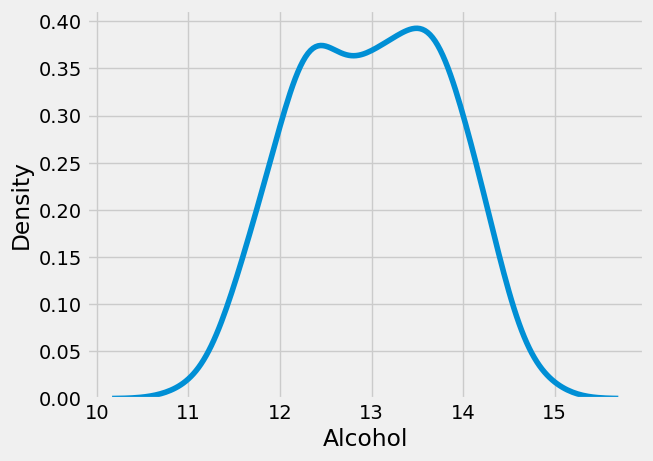

In [40]:
sns.kdeplot(df['Alcohol'])
plt.style.use('fivethirtyeight')

In [41]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

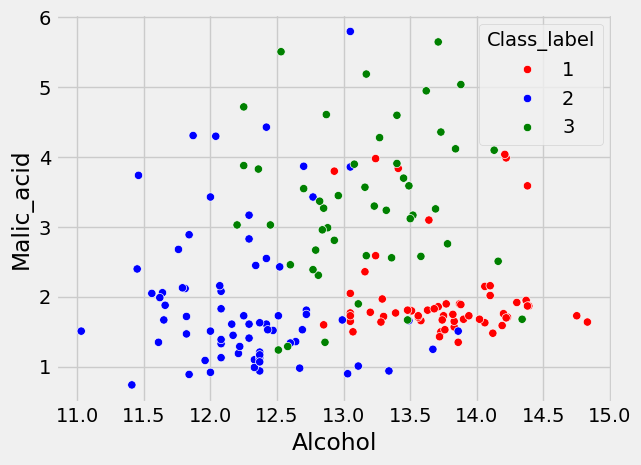

In [42]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x='Alcohol', y='Malic_acid', hue='Class_label', data=df, palette=color_dict)

# Train Test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.drop('Class_label',axis = 1),df['Class_label'],test_size = 0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the training set
scaler.fit(X_train)
# transform the training set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [46]:
np.round(X_train.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [47]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


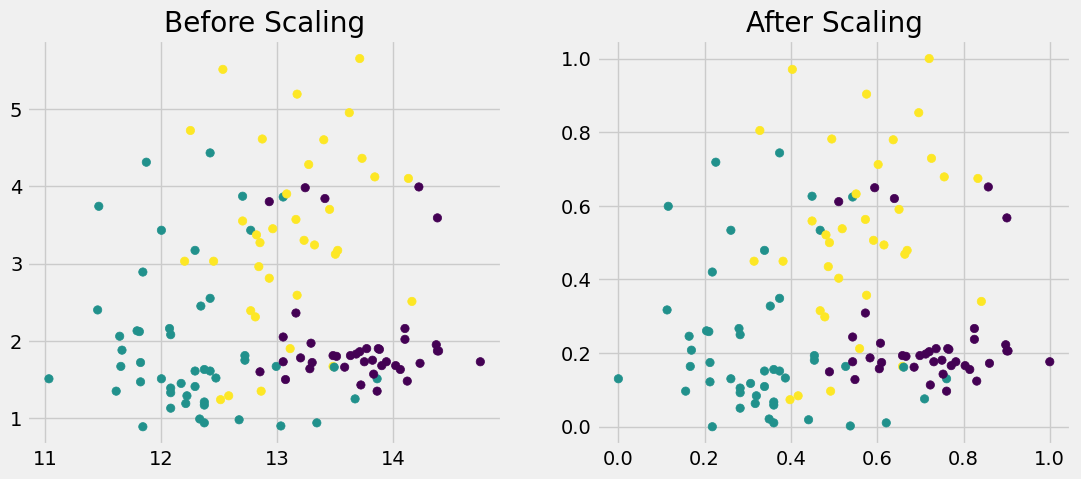

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.scatter(X_train['Alcohol'], X_train['Malic_acid'], c = y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_acid'], c = y_train)
ax2.set_title('After Scaling')
plt.show()

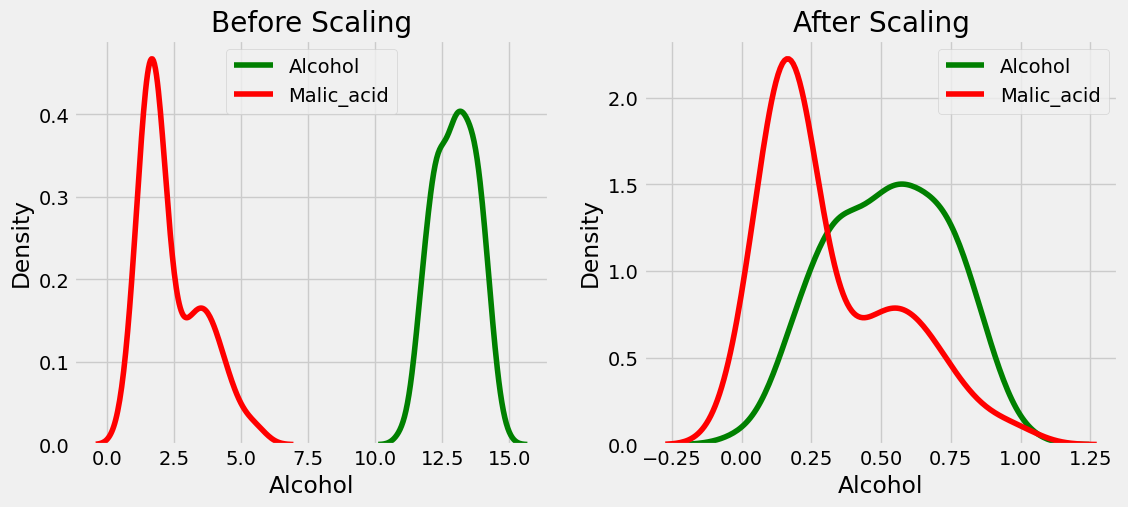

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#Before scaling
sns.kdeplot(X_train['Alcohol'], ax=ax1,color = 'green',label = 'Alcohol')
sns.kdeplot(X_train['Malic_acid'], ax=ax1,color = 'red',label = 'Malic_acid')
ax1.set_title("Before Scaling")
ax1.legend()

#After scaling
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2,color = 'green',label = 'Alcohol')
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2,color = 'red',label = 'Malic_acid')
ax2.set_title("After Scaling")
ax2.legend()
plt.show()